In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

The k-means algorithm searches for a predetermined number of clusters within an
unlabeled multidimensional dataset. It accomplishes this using a simple conception of
what the optimal clustering looks like:

• The “cluster center” is the arithmetic mean of all the points belonging to the
cluster.

• Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. We will soon dive into
exactly how the algorithm reaches this solution, but for now let’s take a look at a simple
dataset and see the k-means result.

First, let’s generate a two-dimensional dataset containing four distinct blobs. To
emphasize that this is an unsupervised algorithm, we will leave the labels out of the
visualization

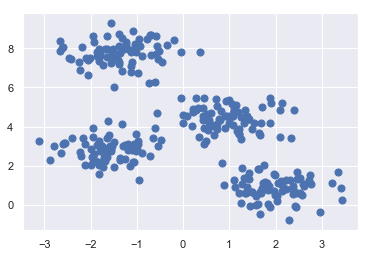

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does
this automatically, and in Scikit-Learn uses the typical estimator API:

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Let’s visualize the results by plotting the data colored by these labels. We will also plot
the cluster centers as determined by the k-means estimator

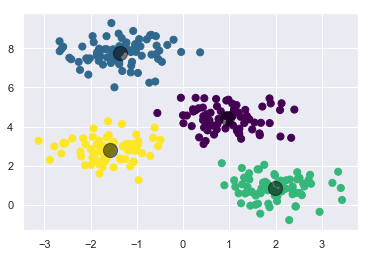

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### k-Means Algorithm: Expectation–Maximization
Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-tounderstand application of the algorithm, and we will walk through it briefly here. In
short, the expectation–maximization approach consists of the following procedure:
    
    1. Guess some cluster centers
    2. Repeat until converged

        a. E-Step: assign points to the nearest cluster center
        b. M-Step: set the cluster centers to the mean
        
Here the “E-step” or “Expectation step” is so named because it involves updating our expectation of which cluster each point belongs to. 

The “M-step” or “Maximization step” is so named because it involves maximizing some fitness function that defines
the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

In [10]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
       
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)  
                                for i in range(n_clusters)])
   
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels 
    centers, labels = find_clusters(X, 4)
    plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
    plt.show()

The globally optimal result may not be achieved

First, although the E–M procedure is guaranteed to improve the result in each
step, there is no assurance that it will lead to the global best solution. For example,
if we use a different random seed in our simple procedure, the particular
starting guesses lead to poor results

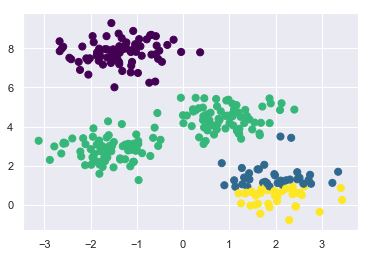

In [11]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

The number of clusters must be selected beforehand

    Another common challenge with k-means is that you must tell it how many clusters
    you expect: it cannot learn the number of clusters from the data. For example,if we ask the algorithm to identify six clusters, it will happily proceed and
    find the best six clusters

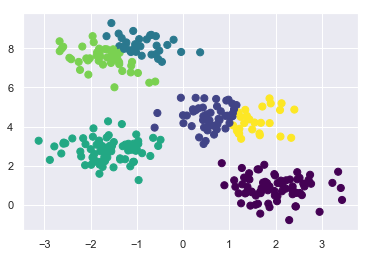

In [12]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

k-means is limited to linear cluster boundaries

    The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.
    
    In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach

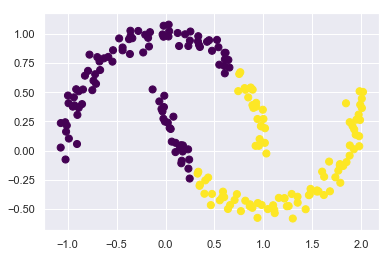

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

One version of this kernelized k-means is implemented in Scikit-Learn within the
SpectralClustering estimator. It uses the graph of nearest neighbors to compute
a higher-dimensional representation of the data, and then assigns labels
using a k-means algorithm

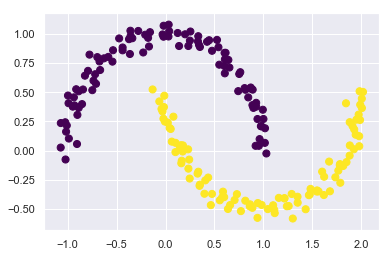

In [15]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

We will start by loading the digits and then finding the KMeans clusters. Recall that the
digits consist of 1,797 samples with 64 features, where each of the 64 features is the
brightness of one pixel in an 8×8 image:

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves
are 64-dimensional points, and can themselves be interpreted as the “typical” digit
within the cluster. Let’s see what these cluster centers look like

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

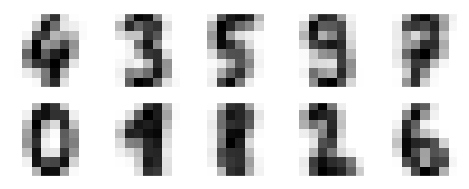

In [19]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are
recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may
be permuted. We can fix this by matching each learned cluster label with the true
labels found in them:

In [20]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

With just a simple k-means algorithm, we discovered the correct grouping for 80% of
the input digits! Let’s check the confusion matrix for this

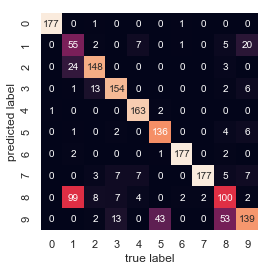

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=digits.target_names,
yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we might expect from the cluster centers we visualized before, the main point of
confusion is between the eights and ones. But this still shows that using k-means, we
can essentially build a digit classifier without reference to any known labels!

We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to preprocess the data before performing k-means. t-SNE is a nonlinear
embedding algorithm that is particularly adept at preserving points within clusters.

In [24]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9398998330550918

That’s nearly 94% classification accuracy without using the labels. This is the power of
unsupervised learning when used carefully: it can extract information from the dataset
that it might be difficult to do by hand or by eye.

### k-means for color compression
One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large
number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

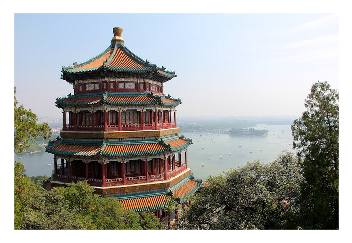

In [27]:
# Note: this requires the pillow package to be installed
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [28]:
#One way we can view this set of pixels is as a cloud of points in a three-dimensional
#color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [37]:
# We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
   
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))  
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

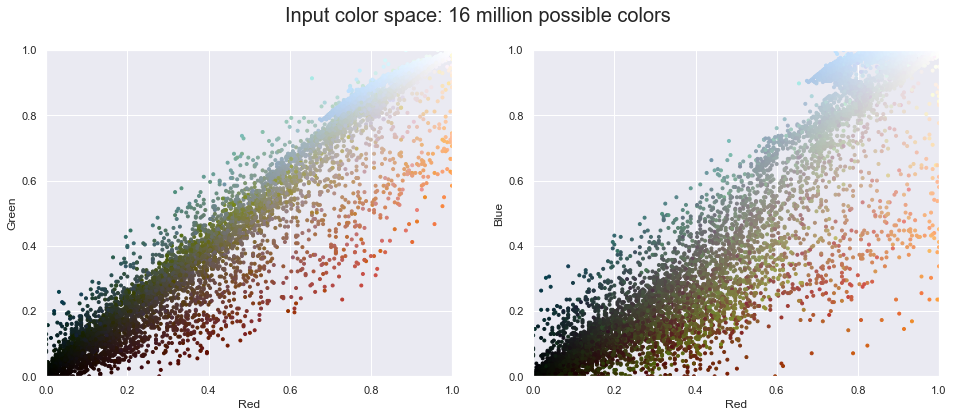

In [38]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let’s reduce these 16 million colors to just 16 colors, using a k-means clustering
across the pixel space. Because we are dealing with a very large dataset, we will use
the mini batch k-means, which operates on subsets of the data to compute the result
much more quickly than the standard k-means algorithm

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=16,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

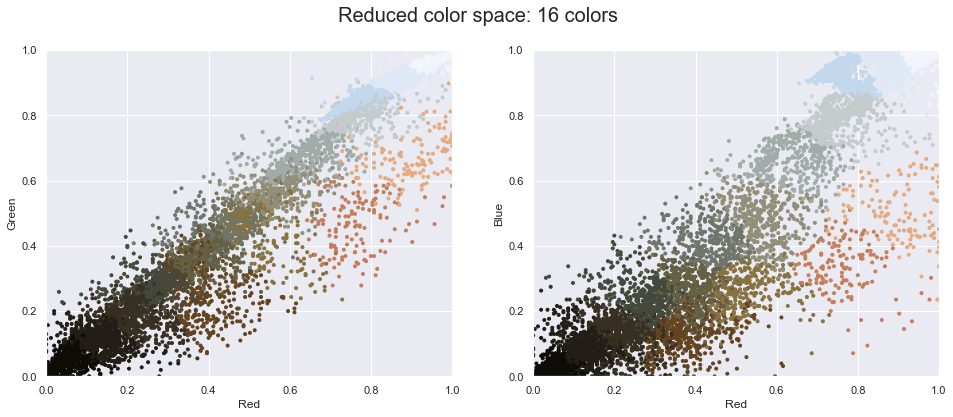

In [39]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

The result is a recoloring of the original pixels, where each pixel is assigned the color
of its closest cluster center. Plotting these new colors in the image space rather than
the pixel space shows us the effect of this

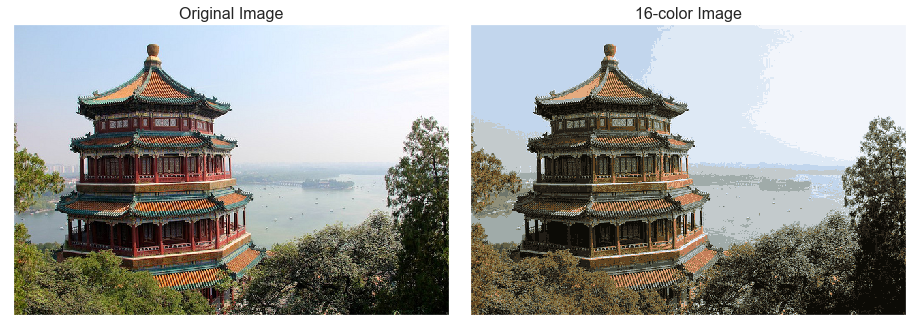

In [40]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);